# Text modeling

Hello everyone! We're going ahead and creating models of our tweets data using `GenSim`. `GenSim` provides facilities for topic modeling and text classification that we will leverage later on.

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import pyLDAvis, pyLDAvis.sklearn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation, PCA
pyLDAvis.enable_notebook()
style.use('fivethirtyeight')

### Data preparation
We're reusing our generated tweets from the previous section. 

In [2]:
# Read cleaned texts
cleaned_tweets = pd.read_csv('out/cleaned_tweets.csv', index_col=None, header=0)
texts = cleaned_tweets['cleaned_text'].astype('U')
cleaned_tweets.head()

,id,handle,created_at,text,cleaned_text
0,1141553866938261505,DoodleSpooks,2019-06-20 03:50:25,"RT @BirdKeeperToby: The Galar region, new Poke...",galar region new pokemon dreadnaw wooloo grook...
1,1141552242912309248,EZDBud,2019-06-20 03:43:58,@JammerHighwind We needed more wooloo in our l...,needed wooloo lives
2,1141551914066333696,Jay_Jitters,2019-06-20 03:42:39,RT @Xephia: A wooloo cloud ☁️🌱 https://t.co/WS...,wooloo cloud
3,1141551873297649669,toboldlylaura,2019-06-20 03:42:30,Friend: I can’t sleep :(\r\r\nMe: want to coun...,friend cant sleep want count sheepme proceeds ...
4,1141551868163829760,Jay_Jitters,2019-06-20 03:42:29,RT @Phoelion: Woohoo! It’s Wooloo!! 💖 https://...,woohoo wooloo


In [3]:
# Load existing vectorizers
dtm_v = pickle.load(open('out/dtm.pk', 'rb'))
ngram_v = pickle.load(open('out/ngram.pk', 'rb'))
tfidf_v = pickle.load(open('out/tfidf.pk', 'rb'))

In [4]:
# Load terms from existing vectorizers
dtm_terms = dtm_v.get_feature_names()
ngram_terms = ngram_v.get_feature_names()
tfidf_terms = tfidf_v.get_feature_names()

In [5]:
# Transform texts into representations
dtm = dtm_v.fit_transform(texts)
ngram = ngram_v.fit_transform(texts)
tfidf = tfidf_v.fit_transform(texts)

### Latent Dirichlet Allocation
`LDA` is used for `topic modeling` by classifying text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions. A lot of math, but the important thing to remember is it can determine related terms that form `topics`.

We are going to user an additional package `pyLDAvis` to visualize our LDA results

**Topic** - set of words similarly used across the corpus

In [6]:
def lda(texts):
    """
    Executes LDA algorithm to determine topics of the corpus
    """
    lda_model = LatentDirichletAllocation(
        n_components=5, max_iter=10,
        learning_method='online', 
        learning_offset=50., random_state=0)
    lda_model.fit_transform(texts)
    return lda_model

In [7]:
# Execute LDA
dtm_lda = lda(dtm)
ngram_lda = lda(ngram)
tfidf_lda = lda(tfidf)

In [8]:
pyLDAvis.sklearn.prepare(dtm_lda, dtm, dtm_v)

c:\users\limri\appdata\local\programs\python\python36-32\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.279788  0.024201       1        1  50.774896
4     -0.040289 -0.200015       2        1  14.338085
1     -0.085412  0.136660       3        1  14.138717
0     -0.070952  0.008042       4        1  11.554463
3     -0.083135  0.031112       5        1   9.193838, topic_info=     Category        Freq                       Term       Total  loglift  \
term                                                                        
787   Default  259.000000                    outfits  259.000000  30.0000   
984   Default  169.000000                      sheep  169.000000  29.0000   
1228  Default  143.000000                       want  143.000000  28.0000   
1282  Default  874.000000                     wooloo  874.000000  27.0000   
672   Default  136.000000                       make  136.000000  26.0000   
475   Default  133.000000                 gossifleur  133.000000  25.0000   
431   Default  131.000000                        fun  131.000000  24.0000   
223   Default  130.000000                 coordinate  130.000000  23.0000   
181   Default   36.000000                   cheering   36.000000  22.0000   
457   Default  156.000000                       girl  156.000000  21.0000   
1327  Default   34.000000      youpokemonswordshield   34.000000  20.0000   
845   Default   63.000000         pokemonswordshield   63.000000  19.0000   
1080  Default   30.000000                      still   30.000000  18.0000   
1076  Default   25.000000                    sticker   25.000000  17.0000   
341   Default   25.000000                      enter   25.000000  16.0000   
410   Default   25.000000                     follow   25.000000  15.0000   
891   Default   24.000000                     random   24.000000  14.0000   
460   Default   24.000000                   giveaway   24.000000  13.0000   
900   Default   24.000000                    receive   24.000000  12.0000   
1262  Default   24.000000                    winners   24.000000  11.0000   
1079  Default   24.000000                 stickersto   24.000000  10.0000   
720   Default   46.000000                       much   46.000000   9.0000   
1008  Default   22.000000                      since   22.000000   8.0000   
726   Default   21.000000                       name   21.000000   7.0000   
300   Default   21.000000                    doodled   21.000000   6.0000   
1151  Default   20.000000                     toffee   20.000000   5.0000   
622   Default   20.000000                      liked   20.000000   4.0000   
842   Default   18.000000      pokemonswordandshield   18.000000   3.0000   
835   Default   83.000000                    pokemon   83.000000   2.0000   
1289  Default   11.000000                    wooloos   11.000000   1.0000   
...       ...         ...                        ...         ...      ...   
314    Topic5    2.529741                    driving    3.261199   2.1327   
1138   Topic5    2.306948  thispokemonswordandsheild    3.036869   2.1117   
356    Topic5    2.307277                  evolution    3.043402   2.1097   
359    Topic5    2.309718                    evolved    3.054199   2.1072   
360    Topic5    2.235574                       evos    2.972855   2.1016   
712    Topic5    2.220547                     months    2.964682   2.0976   
272    Topic5    2.011122                 definitely    2.759332   2.0703   
503    Topic5    1.980747                       hate    2.729589   2.0660   
28     Topic5    1.873025                         al    2.616314   2.0524   
1036   Topic5    1.744647                      sonia    2.479985   2.0349   
722    Topic5    3.644793                        mya    5.208504   2.0296   
768    Topic5    1.687461                        ohh    2.421208   2.0256   
815    Topic5    1.690884                      piece    2.431152   2.0235   
894    Topic5    1.687893            

In [9]:
pyLDAvis.sklearn.prepare(ngram_lda, ngram, ngram_v)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.318602 -0.019202       1        1  28.154723
1     -0.104201 -0.236246       2        1  21.308419
2     -0.066819  0.068041       3        1  17.022184
4     -0.077456  0.110604       4        1  16.868964
3     -0.070125  0.076803       5        1  16.645710, topic_info=     Category        Freq                                Term       Total  \
term                                                                        
617   Default  119.000000                         girl wooloo  119.000000   
1774  Default  119.000000                   wooloo gossifleur  119.000000   
1033  Default  119.000000                       outfits sheep  119.000000   
569   Default  119.000000                            fun make  119.000000   
847   Default  119.000000                           make want  119.000000   
650   Default  119.000000                      gossifleur fun  119.000000   
1636  Default  119.000000                     want coordinate  119.000000   
1316  Default  119.000000                          sheep girl  119.000000   
273   Default  118.000000                  coordinate outfits  118.000000   
825   Default   37.000000                         love wooloo   37.000000   
229   Default   31.000000      cheering youpokemonswordshield   31.000000   
1830  Default   24.000000           wooloo pokemonswordshield   24.000000   
1769  Default   21.000000                         wooloo girl   21.000000   
1433  Default   21.000000                    sticker giveaway   21.000000   
1440  Default   21.000000                    stickersto enter   21.000000   
622   Default   21.000000                     giveaway random   21.000000   
1871  Default   21.000000                      wooloo sticker   21.000000   
1873  Default   21.000000                   wooloo stickersto   21.000000   
1214  Default   21.000000                      receive wooloo   21.000000   
1197  Default   21.000000                      random winners   21.000000   
1681  Default   21.000000                     winners receive   21.000000   
450   Default   21.000000                        enter follow   21.000000   
1661  Default   29.000000                          weaver amp   29.000000   
60    Default   29.000000                          amp wooloo   29.000000   
934   Default   18.000000                         name toffee   18.000000   
782   Default   18.000000                          liked much   18.000000   
1353  Default   18.000000                         since liked   18.000000   
923   Default   18.000000                        much doodled   18.000000   
388   Default   18.000000                      doodled wooloo   18.000000   
615   Default   18.000000                           girl name   18.000000   
...       ...         ...                                 ...         ...   
1440   Topic5   20.365221                    stickersto enter   21.033829   
1871   Topic5   20.362886                      wooloo sticker   21.034507   
1197   Topic5   20.361075                      random winners   21.032789   
1214   Topic5   20.362736                      receive wooloo   21.036422   
1681   Topic5   20.362684                     winners receive   21.036604   
1873   Topic5   20.365864                   wooloo stickersto   21.040762   
450    Topic5   20.363267                        enter follow   21.039645   
898    Topic5   15.830422                          min wooloo   16.488344   
1731   Topic5    5.793595                        wooloo cloud    6.452295   
993    Topic5    4.269988                      ofcat sleeping    4.945063   
1368   Topic5    4.270092                     sleeping wooloo    4.946497   
1918   Topic5    3.037444                   wooloo wooloogang    3.701576   
786    Topic5    2.819826      little floofpokemonswordshield    3.482410   
666    Topic5    2.818647            

In [10]:
pyLDAvis.sklearn.prepare(tfidf_lda, tfidf, tfidf_v)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.218412  0.006231       1        1  31.327383
1     -0.056587  0.025776       2        1  19.697073
0     -0.064076  0.106455       3        1  17.824876
4     -0.050332 -0.121201       4        1  15.911813
3     -0.047418 -0.017261       5        1  15.238856, topic_info=     Category       Freq                   Term      Total  loglift  logprob
term                                                                        
787   Default  60.000000                outfits  60.000000  30.0000  30.0000
475   Default  30.000000             gossifleur  30.000000  29.0000  29.0000
431   Default  30.000000                    fun  30.000000  28.0000  28.0000
1228  Default  31.000000                   want  31.000000  27.0000  27.0000
223   Default  30.000000             coordinate  30.000000  26.0000  26.0000
672   Default  30.000000                   make  30.000000  25.0000  25.0000
984   Default  33.000000                  sheep  33.000000  24.0000  24.0000
44    Default  17.000000                    amp  17.000000  23.0000  23.0000
1240  Default  16.000000                 weaver  16.000000  22.0000  22.0000
457   Default  32.000000                   girl  32.000000  21.0000  21.0000
181   Default  13.000000               cheering  13.000000  20.0000  20.0000
1327  Default  12.000000  youpokemonswordshield  12.000000  19.0000  19.0000
702   Default  13.000000                    min  13.000000  18.0000  18.0000
1080  Default  11.000000                  still  11.000000  17.0000  17.0000
1278  Default   7.000000                 woohoo   7.000000  16.0000  16.0000
138   Default   6.000000                 breeds   6.000000  15.0000  15.0000
300   Default   6.000000                doodled   6.000000  14.0000  14.0000
1008  Default   6.000000                  since   6.000000  13.0000  13.0000
726   Default   6.000000                   name   6.000000  12.0000  12.0000
1151  Default   6.000000                 toffee   6.000000  11.0000  11.0000
622   Default   6.000000                  liked   6.000000  10.0000  10.0000
1076  Default   6.000000                sticker   6.000000   9.0000   9.0000
341   Default   6.000000                  enter   6.000000   8.0000   8.0000
410   Default   6.000000                 follow   6.000000   7.0000   7.0000
891   Default   6.000000                 random   6.000000   6.0000   6.0000
900   Default   6.000000                receive   6.000000   5.0000   5.0000
460   Default   6.000000               giveaway   6.000000   4.0000   4.0000
1262  Default   6.000000                winners   6.000000   3.0000   3.0000
1079  Default   6.000000             stickersto   6.000000   2.0000   2.0000
720   Default  12.000000                   much  12.000000   1.0000   1.0000
...       ...        ...                    ...        ...      ...      ...
991    Topic5   2.668819                 shield   3.216277   1.6947  -4.8930
292    Topic5   2.673225              different   3.222234   1.6945  -4.8914
641    Topic5   2.672994                   lohi   3.224328   1.6938  -4.8914
805    Topic5   2.672771             personally   3.227957   1.6926  -4.8915
1020   Topic5   2.595002               sleeping   3.137825   1.6914  -4.9211
763    Topic5   2.598008                  ofcat   3.146576   1.6898  -4.9199
438    Topic5   2.467746                  games   3.018205   1.6800  -4.9713
793    Topic5   2.370095                  paper   2.914325   1.6746  -5.0117
1142   Topic5   2.368520               thousand   2.912695   1.6745  -5.0124
1320   Topic5   2.371648                   year   2.919059   1.6736  -5.0111
679    Topic5   2.370839                  mario   2.920164   1.6729  -5.0114
1191   Topic5   2.371589               upcoming   2.924331   1.6718  -5.0111
83     Topic5   2.368472                  babby   2.922103   1.6713  -5.0124
302    Topic5   2.219737             

### K-means clustering
We can find interesting groupings that come out of the data using `K-means`. This algorithm creates `clusters` of data by separating samples into `n` number of groups of equal variance that surround centroids. 

Because our text data representations have many dimensions (1000, 2000), it will be difficult to visualize this properly. However, we will be using dimensionality reduction techniques such as `Prinicipal Component Analysis` and `t-Distributed Stochastic Neighbor Embedding` to reduce our dimensions to two. Again, a lot of mathematics, but an important thing to remember is that both "combine" existing dimensions until only the desired number of dimensions is reached. 

In [8]:
def kmeans(texts, clusters=5):
    """
    Execute Kmeans algorithm to generate clusters
    """
    kmeans_model = KMeans(n_clusters=clusters, max_iter=1000)
    kmeans_model.fit(texts)
    kmeans_result = kmeans_model.predict(texts)
    return kmeans_result

In [9]:
def plot_kmeans(texts, clusters): 
    """
    Generates visualizations of clusters using Prinicipal Component Analysis
    and t-Distributed Stochastic Neighbor Embedding
    """
    pca = PCA(n_components=2).fit_transform(texts.todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(texts.todense()))
    pca_a = pca[:, 0]
    pca_b = pca[:, 1]
    tsne_a = tsne[:, 0]
    tsne_b = tsne[:, 1]
    
    f, ax = plt.subplots(1, 2)
    sns.scatterplot(x=pca_a, y=pca_b, hue=clusters, ax=ax[0], )
    sns.scatterplot(x=tsne_a, y=tsne_b, hue=clusters, ax=ax[1], )

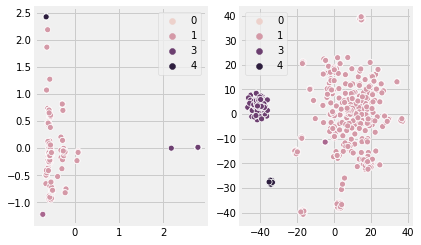

In [10]:
dtm_kmeans = kmeans(dtm)
plot_kmeans(dtm, dtm_kmeans)

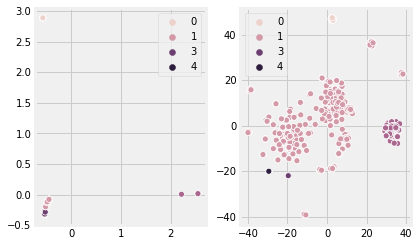

In [11]:
ngram_kmeans = kmeans(ngram)
plot_kmeans(ngram, ngram_kmeans)

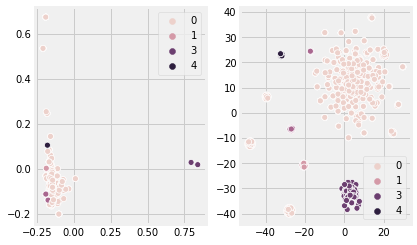

In [12]:
tfidf_kmeans = kmeans(tfidf)
plot_kmeans(tfidf, tfidf_kmeans)